# Homework: Construct a network for XOR

In [1]:
import matplotlib
import numpy as np
from IPython.display import display
from matplotlib import pylab as plt

# matplotlib.rcParams['figure.dpi']=300 # highres display
matplotlib.rcParams['figure.max_open_warning'] = 50

In [2]:
import ipywidgets as widgets

In [3]:
from activationfuncs import jump, linear, sigmoid
from neuralnet import Layer, NeuralNet, column_vec, visualize_2to1_network

In [4]:
def random_weights(n_inputs, n_outputs, weight_range):
    a, b = weight_range
    return a + np.random.random((n_outputs, n_inputs)) * (b - a)

In [5]:
def random_biases(n_inputs, bias_range):
    a, b = bias_range
    return column_vec(a + np.random.random(n_inputs) * (b - a))

In [6]:
def mesh2D(range1, range2, samples=100):
    """Create a an input mesh for efficienet evaluation."""
    y0, y1 = np.meshgrid(
        np.linspace(range1[0], range1[1], samples),
        np.linspace(range2[0], range2[1], samples),
    )
    y_in = np.zeros(shape=(2, samples * samples))
    y_in[0, :] = y0.flatten()
    y_in[1, :] = y1.flatten()
    return y_in

In [7]:
def print_output_range(net, *ranges, samples=200):
    yout = net.evaluate(mesh2D((-10, 10), (-10, 10), samples=200)).flatten()
    print("Min output value: %f" % np.min(yout))
    print("Max output value: %f" % np.max(yout))

In [8]:
def random_network(
    n_hidden_layers=20,
    nodes_per_hidden_layer=10,
    weight_range=(-1, 1),
    bias_range=(-1, 1),
    f_hidden=sigmoid,
    f_out=linear,
    bias_out=0,
):
    """Construct a random neural network."""
    layers = [
        # first hidden layer: from two inputs
        Layer(
            W=random_weights(2, nodes_per_hidden_layer, weight_range),
            b=random_biases(nodes_per_hidden_layer, bias_range),
            f=f_hidden,
        )
    ]
    for i in range(1, n_hidden_layers):
        layers.append(
            Layer(
                W=random_weights(
                    nodes_per_hidden_layer,
                    nodes_per_hidden_layer,
                    weight_range,
                ),
                b=random_biases(nodes_per_hidden_layer, bias_range),
                f=f_hidden,
            )
        )
    # output layer
    layers.append(
        Layer(
            W=random_weights(nodes_per_hidden_layer, 1, weight_range),
            b=bias_out,
            f=f_out,
        )
    )
    return NeuralNet(*layers)

In [9]:
NET = random_network(
    n_hidden_layers=20,
    nodes_per_hidden_layer=100,
    weight_range=(-2, 2),
    bias_range=(-1, 1),
    f_hidden=sigmoid,
    f_out=linear,
    bias_out=0,
)

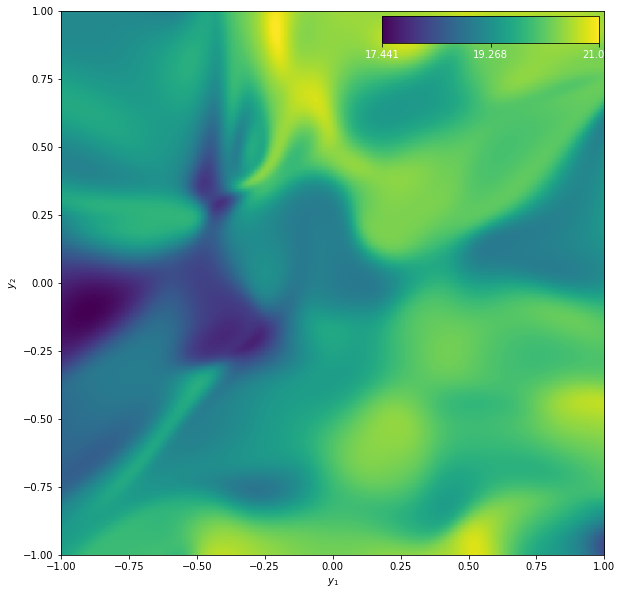

In [10]:
NET.show_output(figsize=(10, 10), samples=400)

In [11]:
def explore_network(net):
    activation_funcs = {
        'sigmoid': sigmoid,
        'linear': linear,
        'jump': jump,
    }

    def show(
        #n_hidden_layers=20,
        #nodes_per_hidden_layer=100,
        scale_weights=1.0,
        scale_biases=1.0,
        scale=1.0,
        shift_hidden_bias=0.0,
        shift_output_bias=0.0,
        f_hidden='sigmoid',
        f_out='linear',
        samples=100,
        y_min=-1,
        y_max=1,
    ):
        _net = (
            net
            .shift_bias(shift_by=shift_hidden_bias, shift_output=False)
            .shift_bias(shift_by=shift_output_bias, shift_hidden=False)
            .scale(scale_weights, scale_biases=False)
            .scale(scale_biases, scale_weights=False)
            .scale(scale)
            .with_hidden_activation_function(activation_funcs[f_hidden])
            .with_output_activation_function(activation_funcs[f_out])
        )
        _net.show_output(
                (y_min, y_max),
                (y_min, y_max),
                samples=samples,
                figsize=(10, 10),
            )

    widgets.interact(
        show,
        #n_hidden_layers=(1, 20, 1),
        #nodes_per_hidden_layer=(1, 200, 10),
        scale_weights=(0.1, 10.0, 0.1),
        scale_biases=(0.1, 10.0, 0.1),
        scale=(1, 10, 1),
        shift_hidden_bias=(-10, 10, 0.1),
        shift_output_bias=(-10, 10, 0.1),
        f_hidden=['sigmoid', 'jump', 'linear'],
        f_out=['sigmoid', 'jump', 'linear'],
        samples=(10, 400, 50),
        y_min=(-10.0, 0.2, 0.1),
        y_max=(0.2, 10.0, 0.1),
    )

In [12]:
explore_network(NET)

interactive(children=(FloatSlider(value=1.0, description='scale_weights', max=10.0, min=0.1), FloatSlider(valu…

In [13]:
def show_layers(net, *ranges, samples=200, figsize=(10, 10)):
    while True:
        net = net.remove_hidden_layer(-1)
        fig = net.show_output(
            *ranges,
            samples,
            figsize,
            fig_title="%d hidden layers" % (net.n_layers - 2),
            show=False,
        )
        plt.close()  # prevent automatic rendering in notebook
        display(fig)  # instead, we plot *explicitly* (so we can print, too)
        print_output_range(net, ranges[0], ranges[1], samples=(samples//10))
        if net.n_layers <= 3:
            return

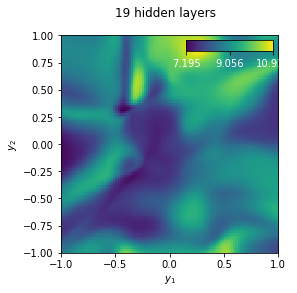

Min output value: 5.578748
Max output value: 12.622317


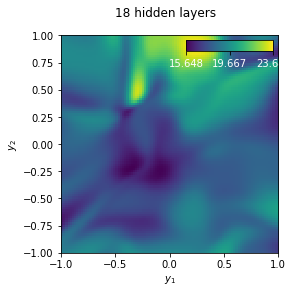

Min output value: 13.300486
Max output value: 24.357035


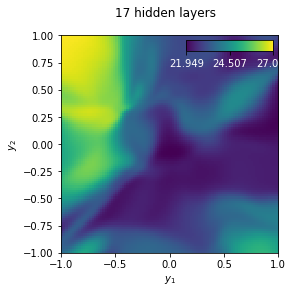

Min output value: 18.747881
Max output value: 27.441553


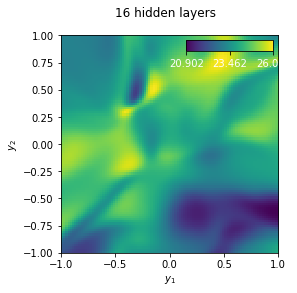

Min output value: 19.687579
Max output value: 27.376834


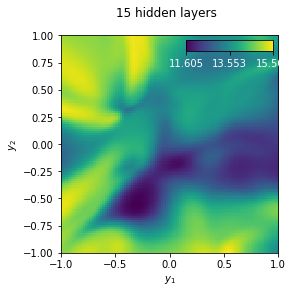

Min output value: 11.631889
Max output value: 19.989797


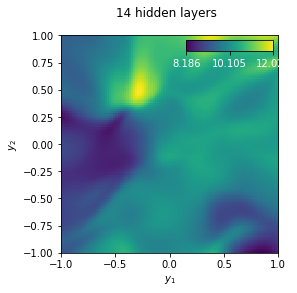

Min output value: 6.099532
Max output value: 13.232506


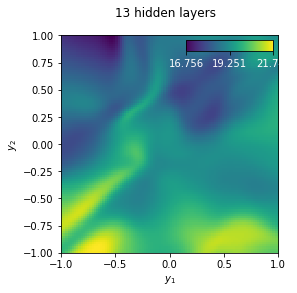

Min output value: 15.686062
Max output value: 22.526521


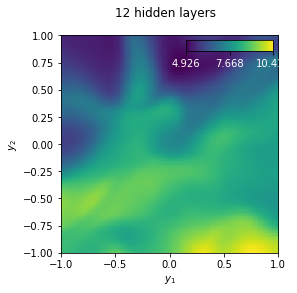

Min output value: 4.415058
Max output value: 12.648725


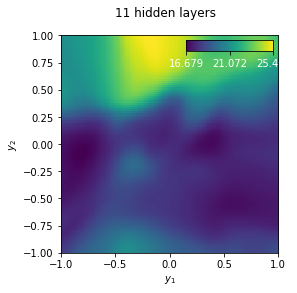

Min output value: 14.704350
Max output value: 25.461969


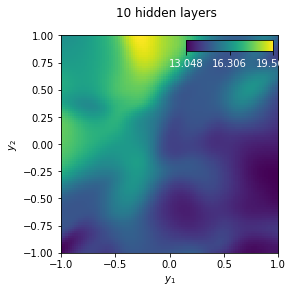

Min output value: 10.267067
Max output value: 19.914952


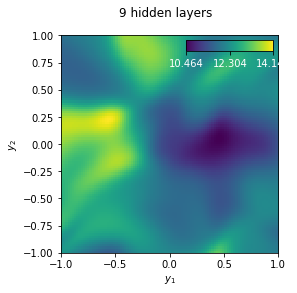

Min output value: 7.834176
Max output value: 15.356376


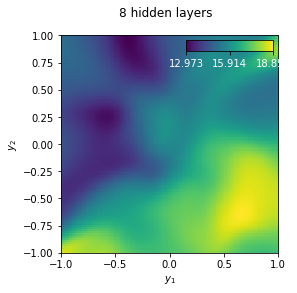

Min output value: 6.121945
Max output value: 19.914173


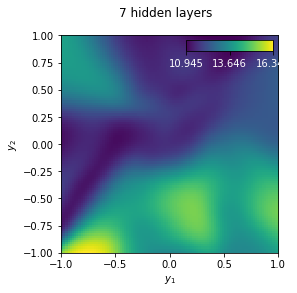

Min output value: 8.321253
Max output value: 16.806548


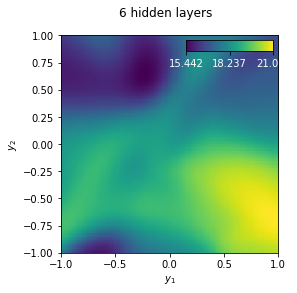

Min output value: 13.767711
Max output value: 21.648496


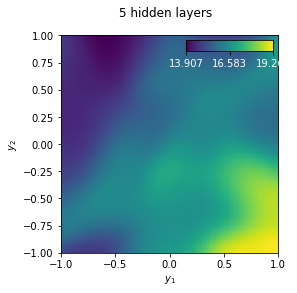

Min output value: 13.867582
Max output value: 20.371691


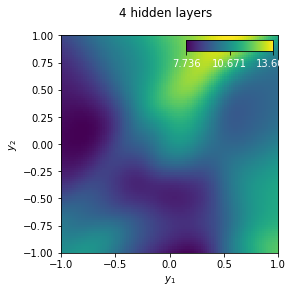

Min output value: 4.708077
Max output value: 18.475102


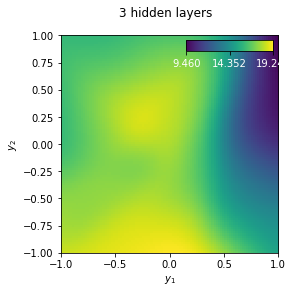

Min output value: 4.348795
Max output value: 22.002583


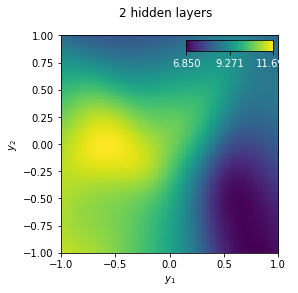

Min output value: 6.001557
Max output value: 12.430545


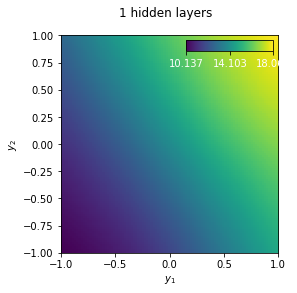

Min output value: 6.325266
Max output value: 20.542195


In [14]:
show_layers(NET, (-1, 1), (-1, 1), figsize=(5, 5));